In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzip the Dataset
import zipfile
import os
# Define the path to the zip file
zip_path = '/content/drive/My Drive/Internship/Task4/Hand Gesture.zip'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/hand_gesture_dataset')

In [4]:
# Data Preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to training and testing datasets
train_dir = '/content/hand_gesture_dataset/train/train'
test_dir = '/content/hand_gesture_dataset/test/test'

# Define image size and batch size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')

Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


In [5]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the Model
EPOCHS = 20

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=test_generator)

Epoch 1/20
563/563 [==============================] - 37s 64ms/step - loss: 1.1781 - accuracy: 0.6008 - val_loss: 0.1503 - val_accuracy: 0.9628
Epoch 2/20
563/563 [==============================] - 36s 64ms/step - loss: 0.4306 - accuracy: 0.8519 - val_loss: 0.0794 - val_accuracy: 0.9835
Epoch 3/20
563/563 [==============================] - 36s 65ms/step - loss: 0.2966 - accuracy: 0.8988 - val_loss: 0.0643 - val_accuracy: 0.9577
Epoch 4/20
563/563 [==============================] - 36s 64ms/step - loss: 0.2182 - accuracy: 0.9248 - val_loss: 0.0668 - val_accuracy: 0.9678
Epoch 5/20
563/563 [==============================] - 36s 63ms/step - loss: 0.1753 - accuracy: 0.9389 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 6/20
563/563 [==============================] - 36s 64ms/step - loss: 0.1542 - accuracy: 0.9489 - val_loss: 0.0084 - val_accuracy: 0.9990
Epoch 7/20
563/563 [==============================] - 35s 63ms/step - loss: 0.1343 - accuracy: 0.9548 - val_loss: 0.0035 - val_accuracy:

In [7]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Step 7: Save the Model
model.save('/content/hand_gesture_model.h5')

188/188 [==============================] - 3s 15ms/step - loss: 0.0015 - accuracy: 0.9995
Test accuracy: 0.9994999766349792


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Using the Trained Model for Predictions  on specific image**

In [8]:
# Load the trained model
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/hand_gesture_model.h5')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
    img_array /= 255.0  # Normalize the image
    return img_array

# Define the path to the image in the test folder
img_path = '/content/hand_gesture_dataset/test/test/7/901.jpg'

# Preprocess the image
img_array = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
print(f'Predicted gesture class: {predicted_class}')


1/1 [==============================] - 0s 100ms/step
Predicted gesture class: 17


**Verifying the Gesture**

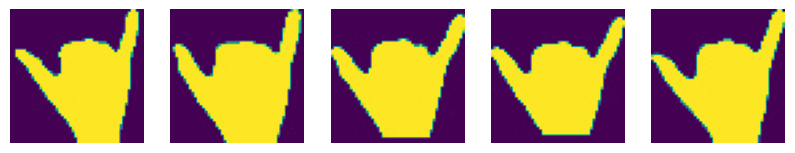

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the path to the class 17 images
class_17_train_dir = '/content/hand_gesture_dataset/train/train/17'

# List a few images from the directory
image_files = os.listdir(class_17_train_dir)
image_files = [os.path.join(class_17_train_dir, img) for img in image_files[:5]]  # Get first 5 images

# Display the images
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


**Using the Trained Model for Predictions  on specific image**

In [14]:
# Load the trained model
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/hand_gesture_model.h5')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
    img_array /= 255.0  # Normalize the image
    return img_array

# Define the path to the image in the test folder
img_path = '/content/hand_gesture_dataset/test/test/1/901.jpg'

# Preprocess the image
img_array = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
print(f'Predicted gesture class: {predicted_class}')


1/1 [==============================] - 0s 78ms/step
Predicted gesture class: 1


**Verifying the Gesture**

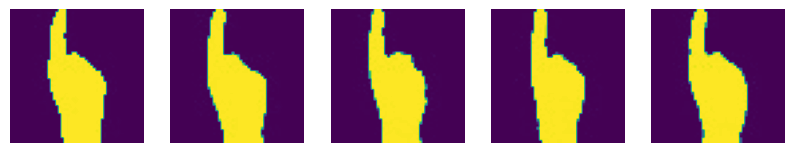

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the path to the class 17 images
class_17_train_dir = '/content/hand_gesture_dataset/train/train/1'

# List a few images from the directory
image_files = os.listdir(class_17_train_dir)
image_files = [os.path.join(class_17_train_dir, img) for img in image_files[:5]]  # Get first 5 images

# Display the images
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()
